In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
#recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).limit(1).all()
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


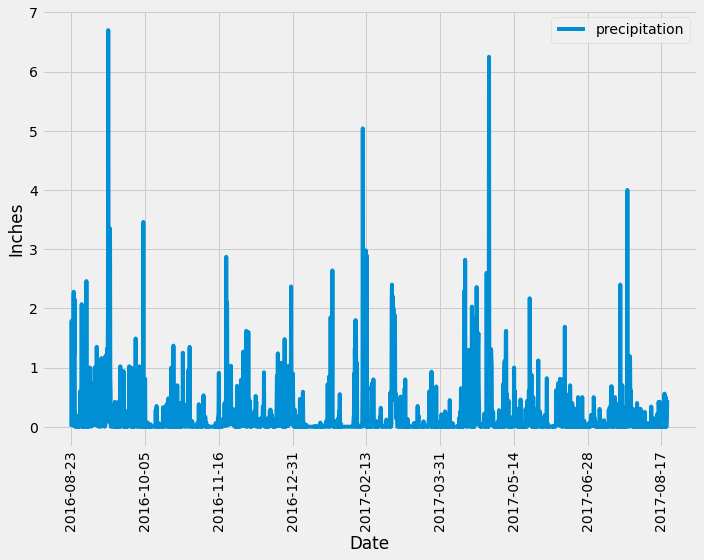

In [56]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago_date = dt.date(2017,8,23) - dt.timedelta(days=365)
#print(year_ago_date)

# Perform a query to retrieve the data and precipitation scores
recent_year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago_date).all()
#recent_year_data

# Save the query results as a Pandas DataFrame. Explicitly set the column names
recent_year_prcp_df = pd.DataFrame(recent_year_data, columns = ['date', 'prcp'])
#recent_year_prcp_df

# Sort the dataframe by date
recent_year_prcp_df = recent_year_prcp_df.sort_values('date', ascending = True)
#recent_year_prcp_df

# Drop NULL values and set index 'date'
recent_year_prcp_df = recent_year_prcp_df.dropna()
recent_year_prcp_df.set_index('date', inplace = True)
#recent_year_prcp_df.head(50)

# Use Pandas Plotting with Matplotlib to plot the data
recent_year_prcp_df.plot(figsize=(10,8), rot = 'vertical')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(['precipitation'])
plt.tight_layout()

plt.show()


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
recent_year_prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [25]:
stations = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()
stations

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [26]:
print(len(stations))

9


In [13]:
# Design a query to calculate the total number of stations in the dataset
stations_total = session.query(func.count(Measurement.station.distinct())).scalar()
stations_total

9

In [39]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

station_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

for row in station_count:
    print(row)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [22]:
active_st = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()
most_active = active_st[0]
most_active

'USC00519281'

In [44]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station==most_active).all()
#active_station
temp_active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()
temp_active_station

[(53.0, 87.0, 73.09795396419437)]

In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Here I used the hard-coded value of most active station ID copied from the previous list, as I was not sure if 
# it had to be passed as a variable or directly (see previous cell for version with variable passing). 
active_station = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station=='USC00519281').all()
#active_station
temp_active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()
temp_active_station

[(53.0, 87.0, 73.09795396419437)]

In [38]:
one_year_temp_active_st = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station==most_active).filter(Measurement.date >= year_ago_date).all()
one_year_temp_df = pd.DataFrame(one_year_temp_active_st, columns = ['date', 'tobs'])
one_year_temp_df.set_index('date', inplace = True)
one_year_temp_df

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


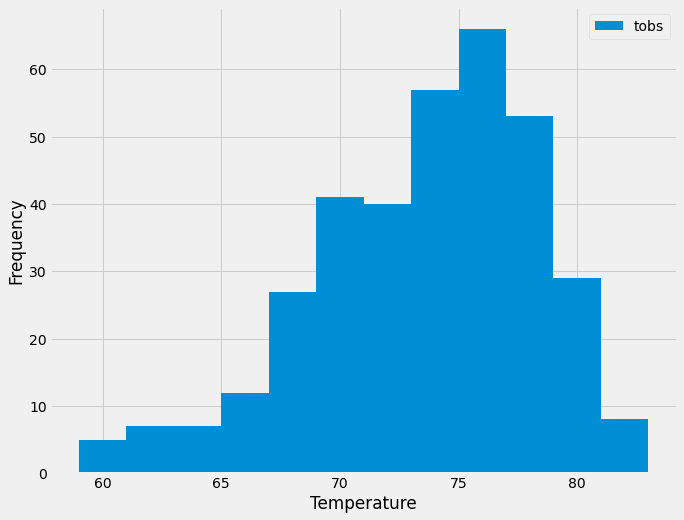

In [57]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_temp_active_st = session.query(Measurement.tobs).filter(Measurement.station==most_active).filter(Measurement.date >= year_ago_date).all()
#one_year_temp_active_st = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').filter(Measurement.date >= year_ago_date).all()
one_year_temp_df = pd.DataFrame(one_year_temp_active_st)
#one_year_temp_df
one_year_temp_df.plot(kind='hist', figsize=(10,8), bins=12)
plt.xlabel("Temperature")
plt.legend(['tobs'])
plt.show()


# Close Session

In [17]:
# Close Session
session.close()